# Conversion from deconvolved signal to origin  
### Author: Javier Gamero Muñoz

**Table of contents**<a id='toc0_'></a>    
- 1. [General libraries](#toc1_)    
- 2. [Load data](#toc2_)    
  - 2.1. [Ideal data (origin)](#toc2_1_)    
  - 2.2. [Deconvolved data reduced](#toc2_2_)    
  - 2.3. [Energy](#toc2_3_)    
- 3. [Functions](#toc3_)    
- 4. [Calibration](#toc4_)    
  - 4.1. [Calibration factor](#toc4_1_)    
  - 4.2. [Signals calibrated](#toc4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[General libraries](#toc0_)

In [1]:
import os 
import sys 

# path to python main folder in this project
libraries = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) 
sys.path.append(libraries) 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from decompose import greedyDecomposition, calibration

# 2. <a id='toc2_'></a>[Load data](#toc0_)

In [2]:
PATH = os.path.abspath(os.path.join(os.getcwd(), (os.pardir+'/')*3)) # main path
PATH

'/Users/javigamero/MyMac/DS_Master/TFM'

## 2.1. <a id='toc2_1_'></a>[Ideal data (origin)](#toc0_)

In [3]:
t_path = os.path.join(PATH, 'data_preproc/LightSignal_t.csv')
t_id = pd.read_csv(t_path, sep=';', header=None) # t[0] is nonsensen, remove it
t_id.set_index(0, inplace=True)

t_id = np.array(t_id).reshape(-1).astype(np.int32)
print(t_id.shape)

(1000,)


In [4]:
t0 = 150 # (ns), moment to start considering the slow component, EXPERIMENTAL
t_idx = np.where(t_id>t0)[0]
t_idx.shape

t1 = 500 # (ns), moment to start considering the slow component, EXPERIMENTAL
t_idx1 = np.where(t_id>t1)[0]
t_idx1.shape

(950,)

In [5]:
id_path = os.path.join(PATH, 'data_preproc/LightSignal_total.csv')
signals_id = pd.read_csv(id_path, sep=';', header=None)
signals_id.set_index(0, inplace=True)
print('Ideal signals df shape: ', signals_id.shape)

Ideal signals df shape:  (9325, 1000)


In [6]:
signals_id.head()

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,,,,,,,,,,,,,,,,,,,,,
0_1,0,0,0,18,1024,1755,1309,809,552,369,...,0,0,0,1,0,0,0,0,0,1
0_4,0,0,0,17,537,1262,1065,678,436,299,...,0,0,0,0,0,0,0,0,0,0
0_6,0,0,0,13,740,1238,840,507,300,206,...,0,0,0,0,0,0,0,1,0,1
0_8,0,0,0,97,962,1086,627,338,258,177,...,0,0,0,0,0,0,0,0,0,0
0_9,0,0,0,18,712,1509,957,523,316,202,...,0,0,0,0,0,0,0,0,0,0


## 2.2. <a id='toc2_2_'></a>[Deconvolved data reduced](#toc0_)

In [7]:
data_path = os.path.join(os.path.join(PATH, 'data_preproc'), 'DeconvolvedSignal_us.csv')
signals_dec_us = pd.read_csv(data_path, sep=';', header=None, index_col=0)

print(signals_dec_us.shape)
signals_dec_us.head()

(9325, 1000)


,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,,,,,,,,,,,,,,,,,,,,,
0_1,-0.013636,0.003455,5.652545,28.486182,44.607818,35.096364,21.015091,11.813455,7.580909,6.095455,...,-0.016545,-0.031273,-0.032909,-0.032000,-0.023455,-0.021091,-0.014000,-0.017818,-0.018545,-0.02250
0_4,0.000182,0.000727,1.786182,12.082909,23.939818,23.189455,14.626545,8.413455,5.297636,3.896545,...,0.001455,0.001273,0.002000,0.000182,-0.000909,-0.002182,-0.005818,-0.005273,-0.003818,-0.00250
0_6,0.004182,-0.002182,4.107455,18.174182,28.416909,23.247273,13.882909,7.938727,4.708000,3.035455,...,0.005455,0.005273,0.007091,0.008364,0.009091,0.010182,0.008909,0.006364,0.009455,0.00475
0_8,-0.008000,0.303091,5.657455,16.356182,20.395273,15.051636,8.831818,5.433091,3.595455,2.263455,...,-0.006182,-0.004909,-0.011818,-0.012000,-0.010727,-0.006727,-0.008727,-0.009818,-0.005818,-0.00800
0_9,0.007636,0.073455,3.116182,15.448909,23.388909,18.269273,11.052000,6.872364,4.603273,2.915636,...,0.000909,0.001091,0.001091,0.005091,0.006909,0.008727,0.006545,0.001273,0.006182,0.00525


## 2.3. <a id='toc2_3_'></a>[Energy](#toc0_)

In [8]:
dE_path = os.path.join(PATH, 'data_preproc/dE.csv')
dE = pd.read_csv(dE_path, sep=';', header=0, index_col=0)
dE = dE.loc[signals_id.index]

In [9]:
dE.head()

,dE
0,
0_1,48.297063
0_4,39.765737
0_6,43.809366
0_8,50.682234
0_9,52.356169


# 3. <a id='toc3_'></a>[Functions](#toc0_)

In [10]:
def plotSignals(t, v, labels, xlabel='Time, t (ns)', ylabel='# photons', sep=False,
                figsize=(5,5)): 
    if len(v)!=len(labels): 
        print('Wrong number of labels')
        return
    
    # in separate plots
    if sep: 
        fig, axs = plt.subplots(1,len(v), figsize=figsize)
        for i in range(len(v)): 
            axs[i].plot(t, v[i], label=labels[i])
            axs[i].set_xlabel(xlabel)
            axs[i].set_ylabel(ylabel) 
            axs[i].legend(loc='best')
            
        plt.tight_layout()
        plt.show()

        return
    
    # all in one figure and plot
    else: 
        plt.figure(figsize=figsize)
        for i in range(len(v)): 
            plt.plot(t, v[i], label=labels[i], alpha=0.75)
            
        plt.xlabel(xlabel)
        plt.ylabel(ylabel) 
        plt.legend(loc='best')
        plt.show()
        
        return

In [11]:
signals_id.iloc[:5,:].index

Index(['0_1', '0_4', '0_6', '0_8', '0_9'], dtype='object', name=0)

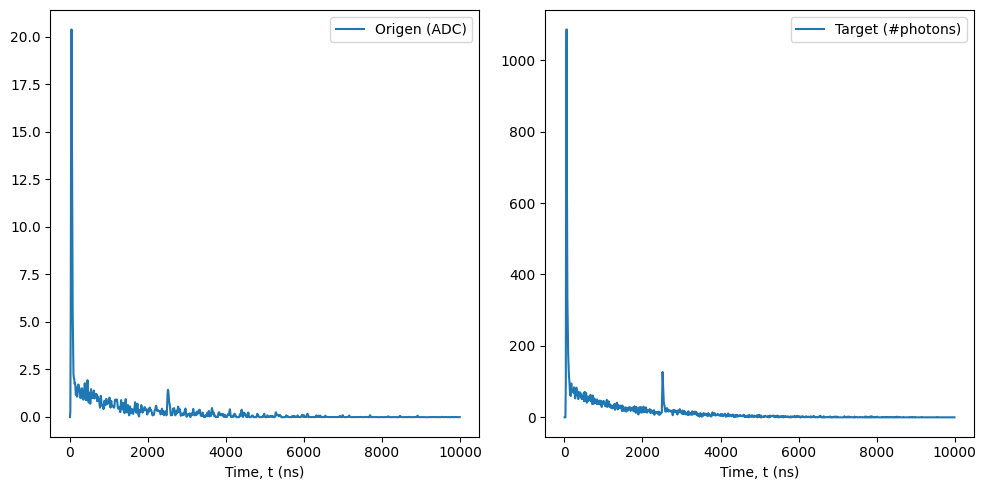

In [12]:
i=3
v = [signals_dec_us.iloc[i,:], signals_id.iloc[i,:]]
plotSignals(t_id, v, ['Origen (ADC)', 'Target (#photons)'], ylabel='', 
            sep=True, figsize=(10,5))

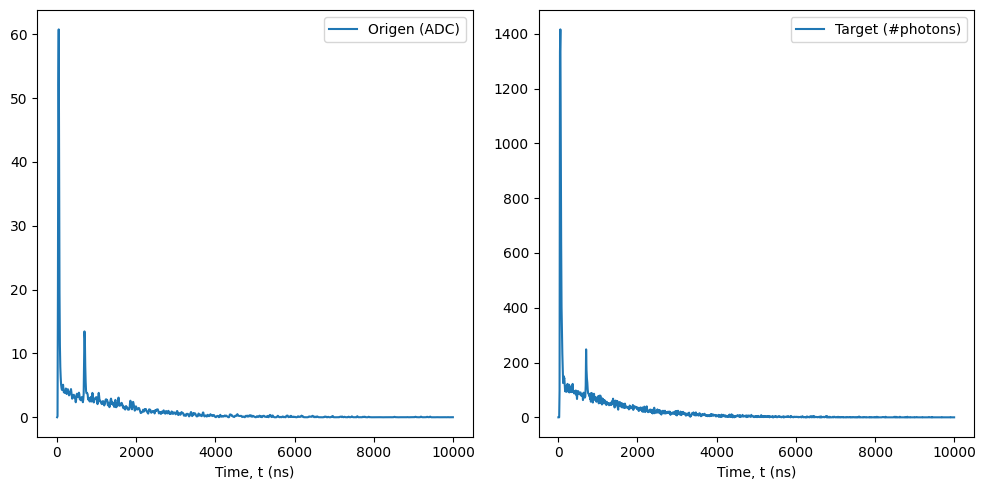

In [13]:
i=10
v = [signals_dec_us.iloc[i,:], signals_id.iloc[i,:]]
plotSignals(t_id[:], v, ['Origen (ADC)', 'Target (#photons)'], ylabel='', 
            sep=True, figsize=(10,5))

# 4. <a id='toc4_'></a>[Calibration](#toc0_)

## 4.1. <a id='toc4_1_'></a>[Calibration factor](#toc0_)

Calibration factor distribution returned


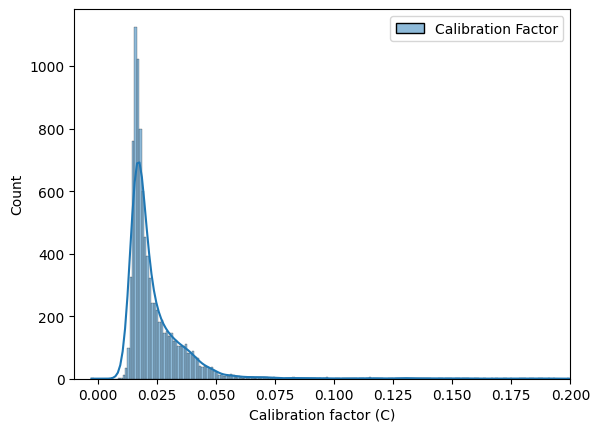

In [14]:
cal = calibration(signal_dec=signals_dec_us, 
                  signal_id=signals_id,
                  t=t_id)

C = cal._calculate_CalibrationFactor(return_dist=True)
data = pd.DataFrame({'Calibration Factor': C[C<0.2]})

sns.histplot(data=data, kde=True)
plt.xlim(-0.01,0.2)
plt.xlabel('Calibration factor (C)')
plt.show()

In [15]:
cal = calibration(signal_dec=signals_dec_us, 
                  signal_id=signals_id,
                  t=t_id)

C = cal._calculate_CalibrationFactor(return_C=True)
print('Final calibration factor, C: ', C)

Calibration factor returned
Final calibration factor, C:  0.016


## 4.2. <a id='toc4_2_'></a>[Signals calibrated](#toc0_)

In [16]:
cal = calibration(signal_dec=signals_dec_us, pre_C=True)

signals_calibrated = cal.calibrate()
signals_calibrated.shape

Calibration Factor introduced:  0.016


(9325, 1000)

Good example of the calibration:

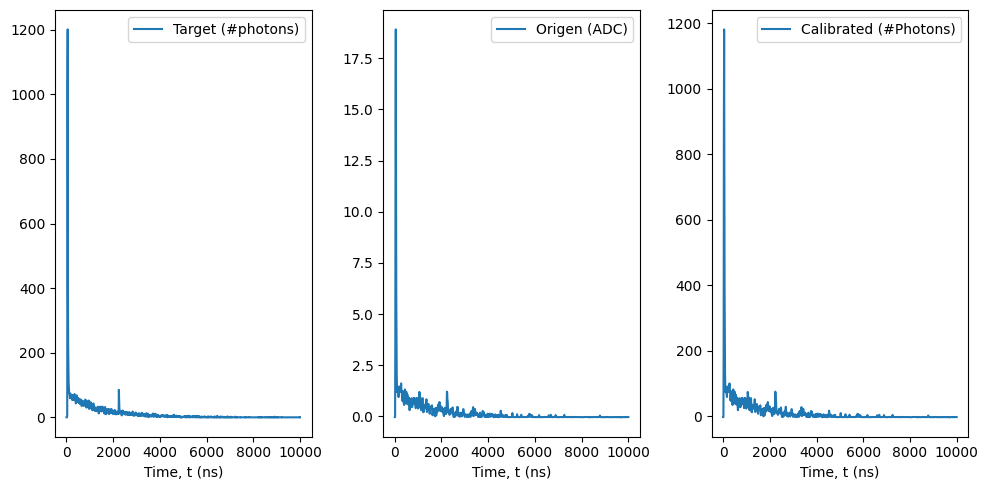

In [17]:
i=13
v = [signals_id.iloc[i,:], signals_dec_us.iloc[i,:], signals_calibrated[i,:]]
plotSignals(t_id, v, ['Target (#photons)', 'Origen (ADC)', 'Calibrated (#Photons)'], 
            ylabel='', sep=True, figsize=(10,5))

Not well enough

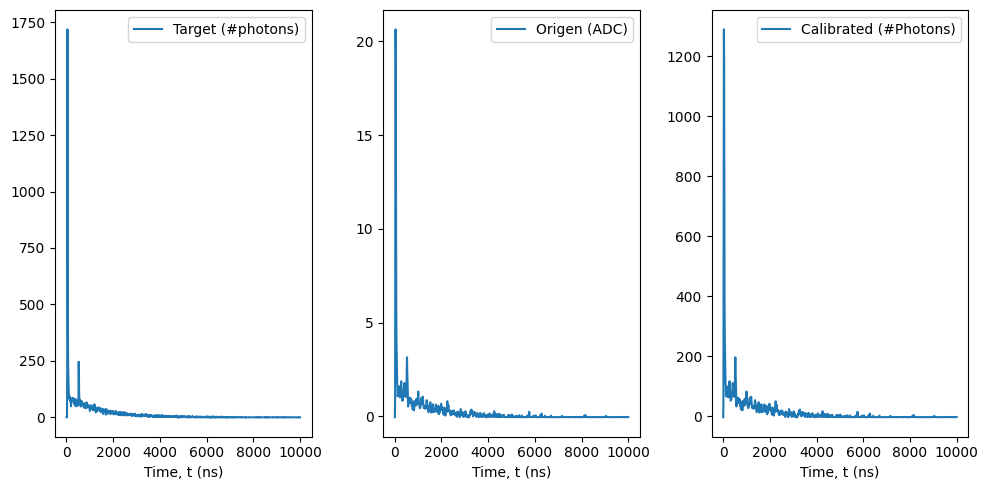

In [18]:
i=18
v = [signals_id.iloc[i,:], signals_dec_us.iloc[i,:], signals_calibrated[i,:]]
plotSignals(t_id, v, ['Target (#photons)', 'Origen (ADC)', 'Calibrated (#Photons)'], 
            ylabel='', sep=True, figsize=(10,5))

Bad

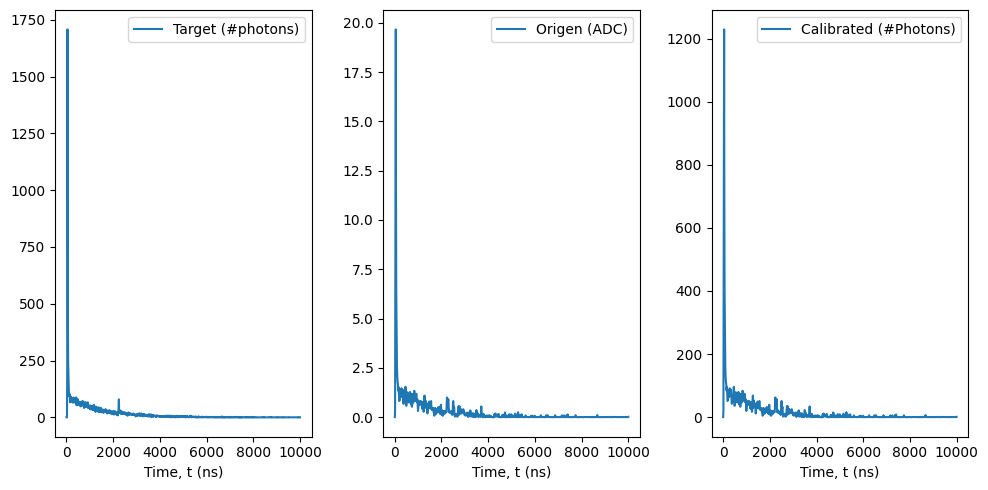

In [19]:
i=11
v = [signals_id.iloc[i,:], signals_dec_us.iloc[i,:], signals_calibrated[i,:]]
plotSignals(t_id, v, ['Target (#photons)', 'Origen (ADC)', 'Calibrated (#Photons)'], 
            ylabel='', sep=True, figsize=(10,5))